In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Downloads\\database_IND.csv")

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

KeyError: "['country', 'country_long', 'url', 'year_of_capacity_data', 'gppd_idnr', 'owner', 'other_fuel3', 'other_fuel2', 'estimated_generation_gwh', 'wepp_id'] not found in axis"

In [8]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                906       99.889746
other_fuel1                        709       78.169791
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2013                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
commissioning_year                 374       41.234840
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


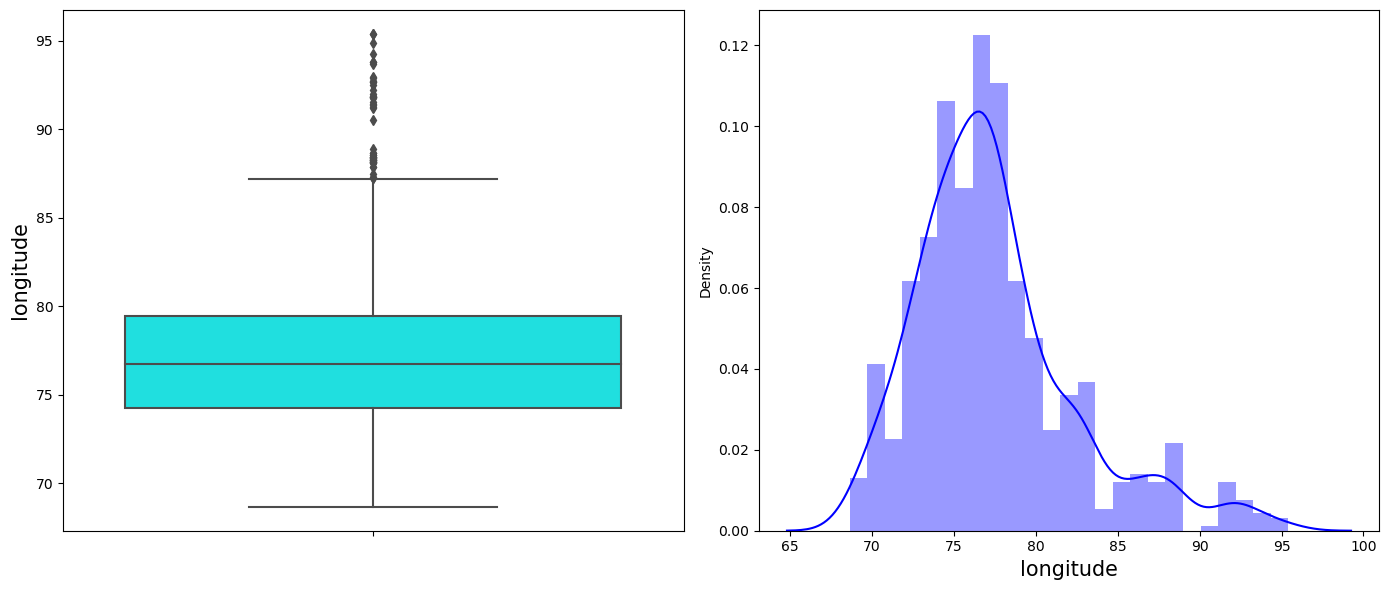

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

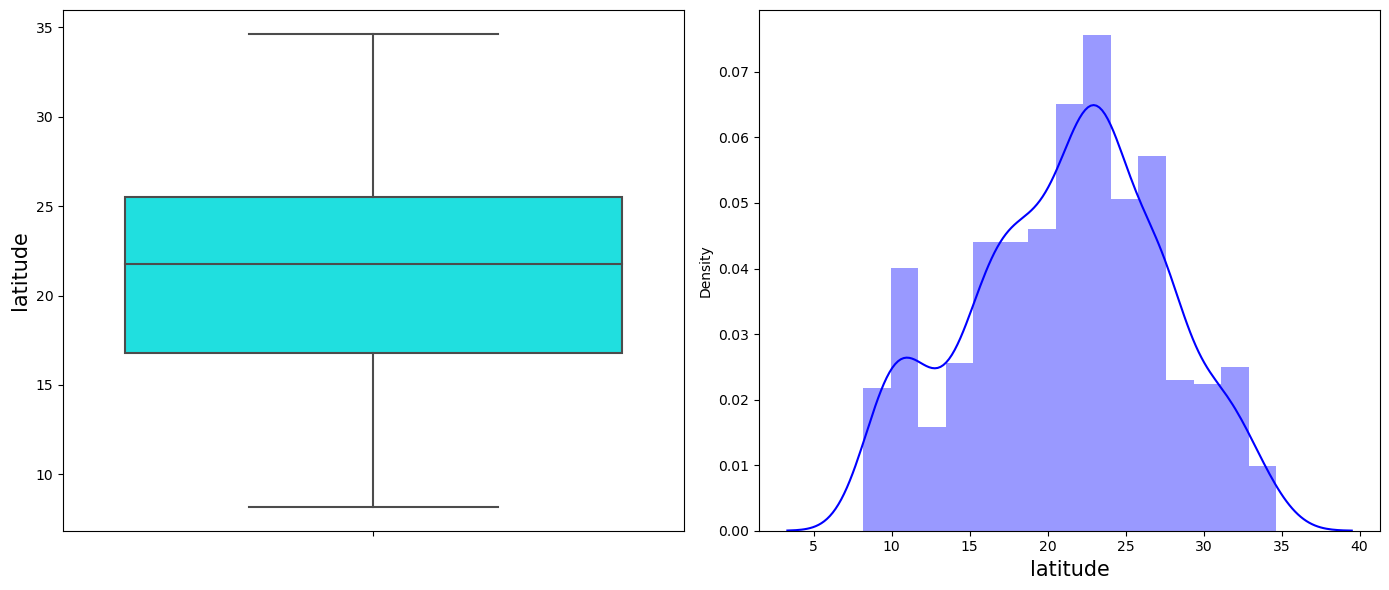

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [11]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                906       99.889746
other_fuel1                        709       78.169791
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2013                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
commissioning_year                 374       41.234840
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,533.000000,446.000000,404.000000,428.000000,440.000000,446.000000,453.000000
mean,326.223755,21.197918,77.427103,1997.078799,436.579872,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215
std,590.085456,6.079148,4.815073,17.119477,1624.717598,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169
min,0.000000,8.168900,68.644700,1927.000000,-947.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,0.688250,219.417762,180.793688,186.152062,178.397305,196.054800
50%,59.200000,21.281800,76.719500,2001.000000,14.264000,794.587100,697.450781,737.205450,817.977250,798.381000
75%,385.250000,25.176450,79.206100,2012.000000,138.133250,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000
max,4760.000000,34.649000,95.408000,2018.000000,14779.303000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [14]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [15]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,11.354,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [16]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.loc[df.capacity_mw >1500].shape

(39, 17)

In [18]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

TypeError: countplot() got multiple values for argument 'data'

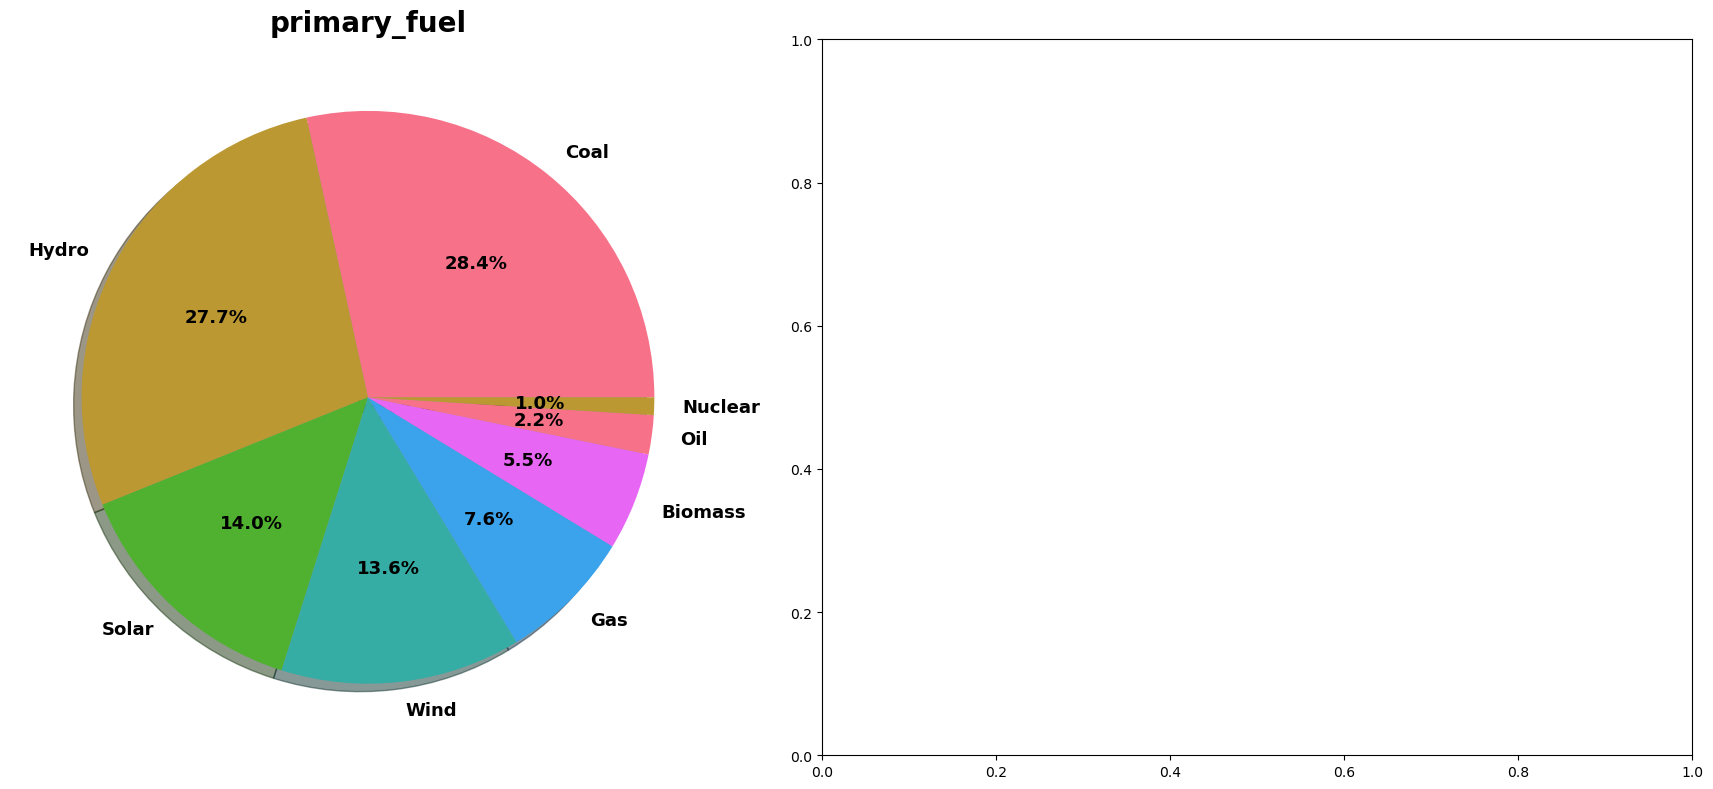

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()


In [21]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [22]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [23]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


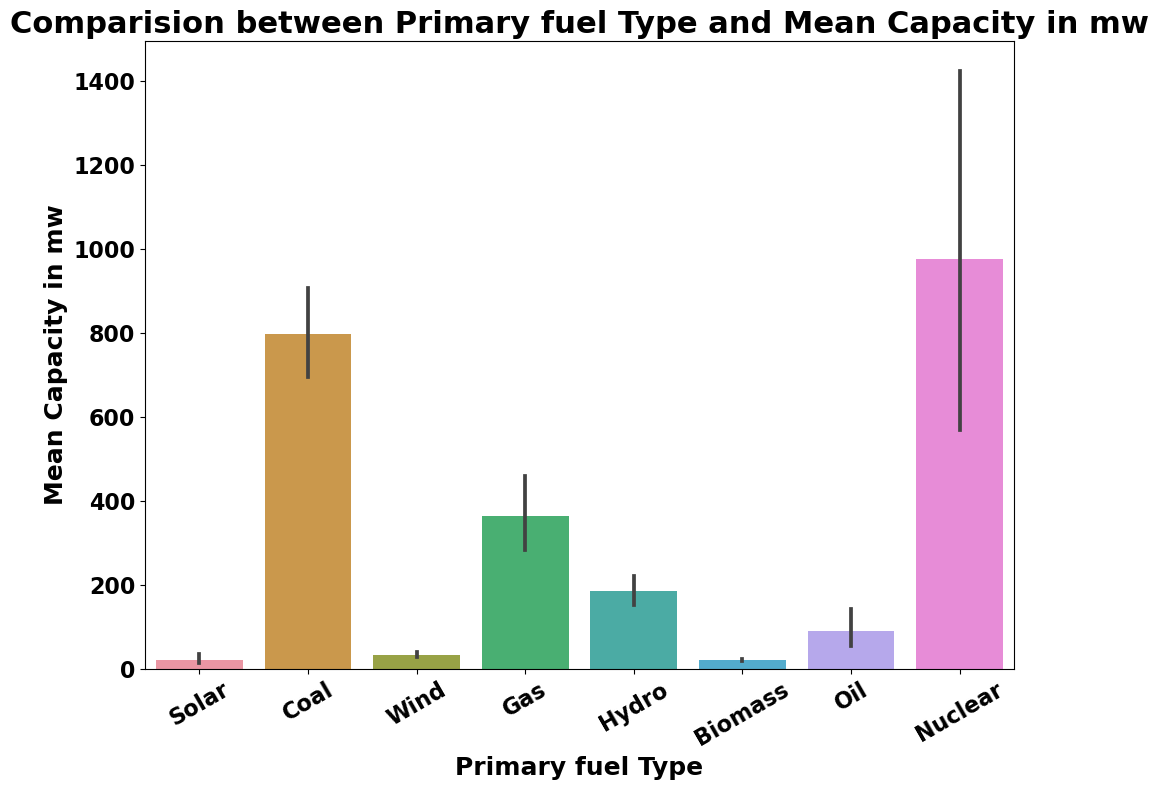

In [24]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

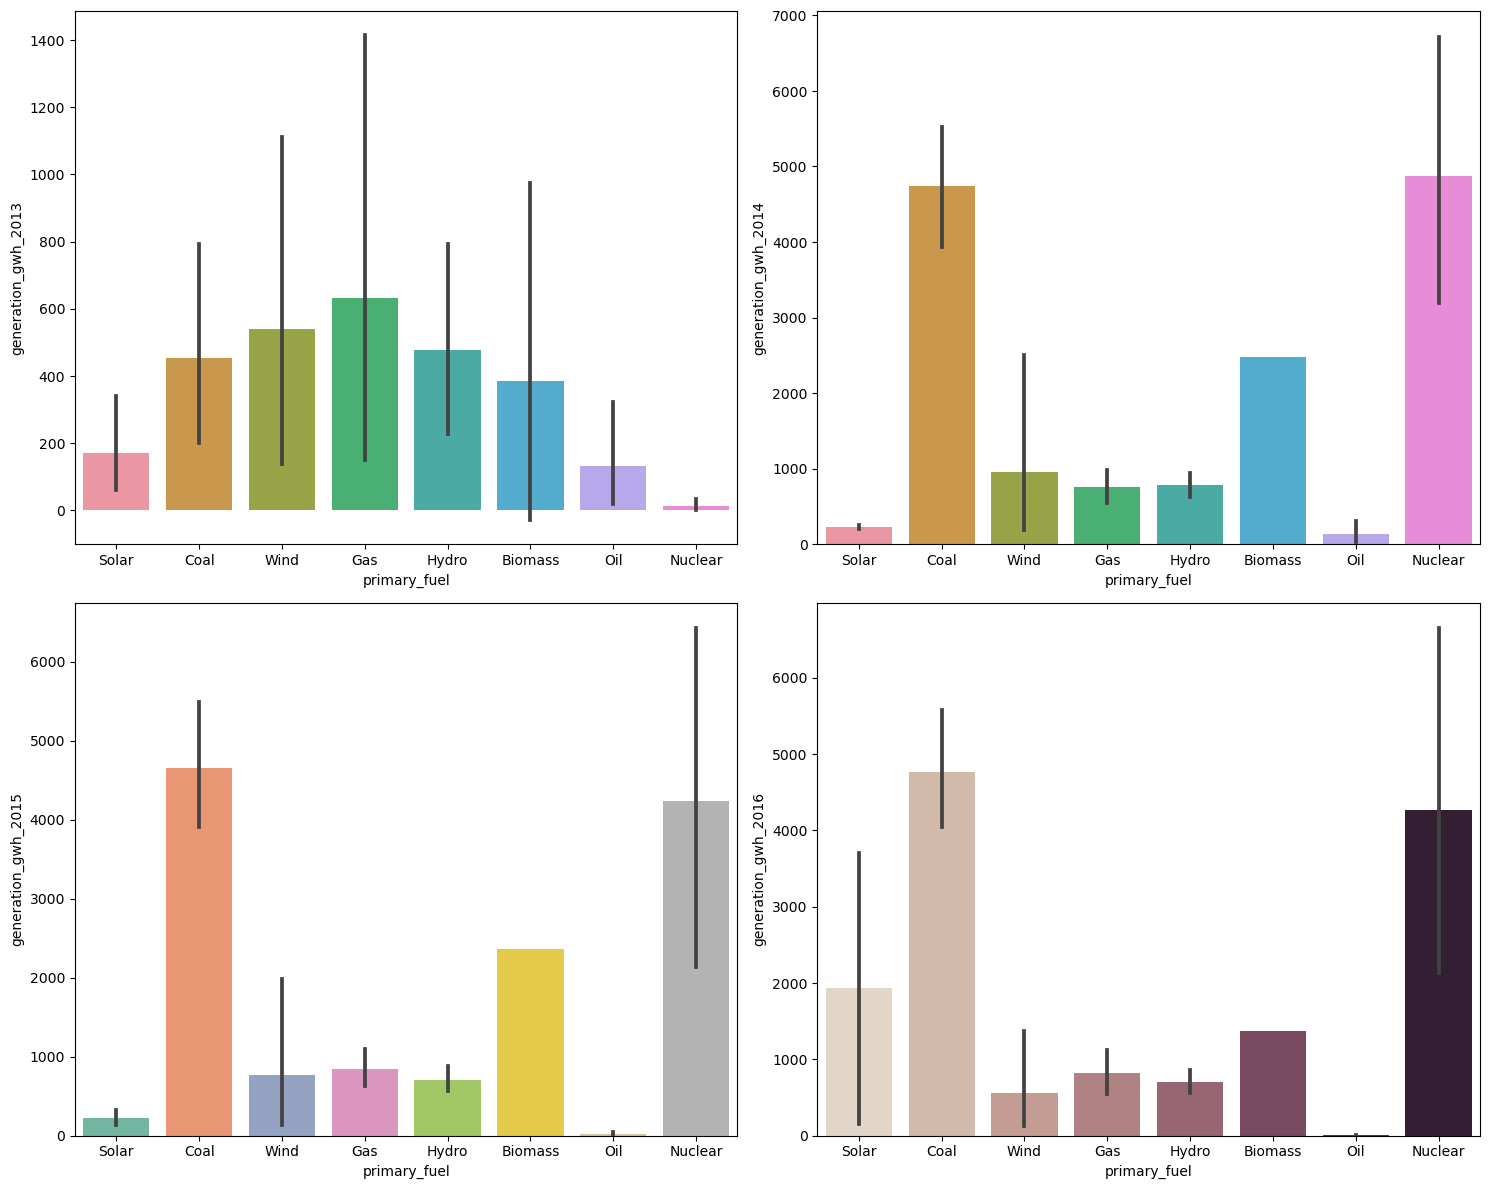

In [25]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

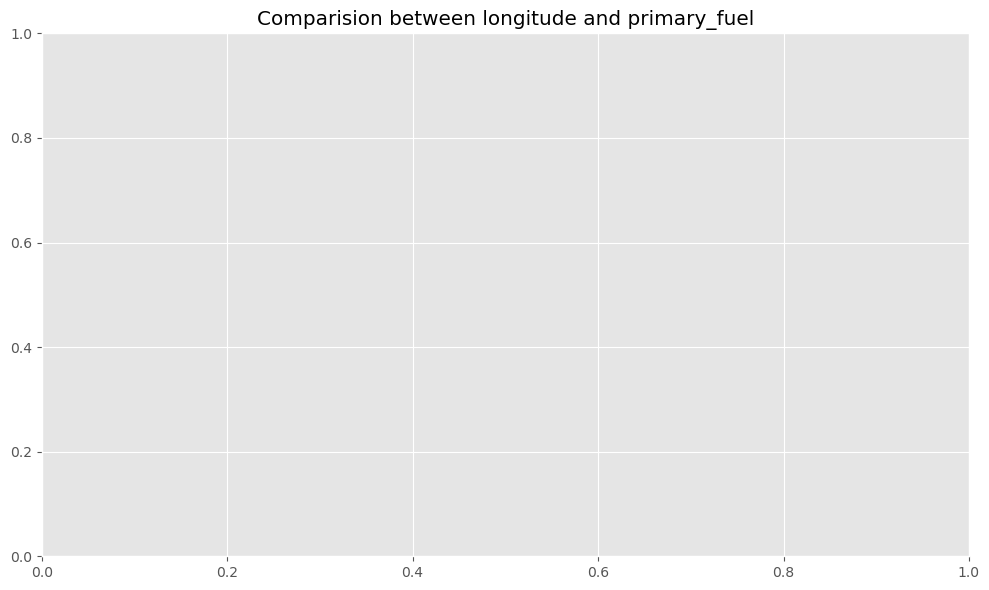

In [26]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

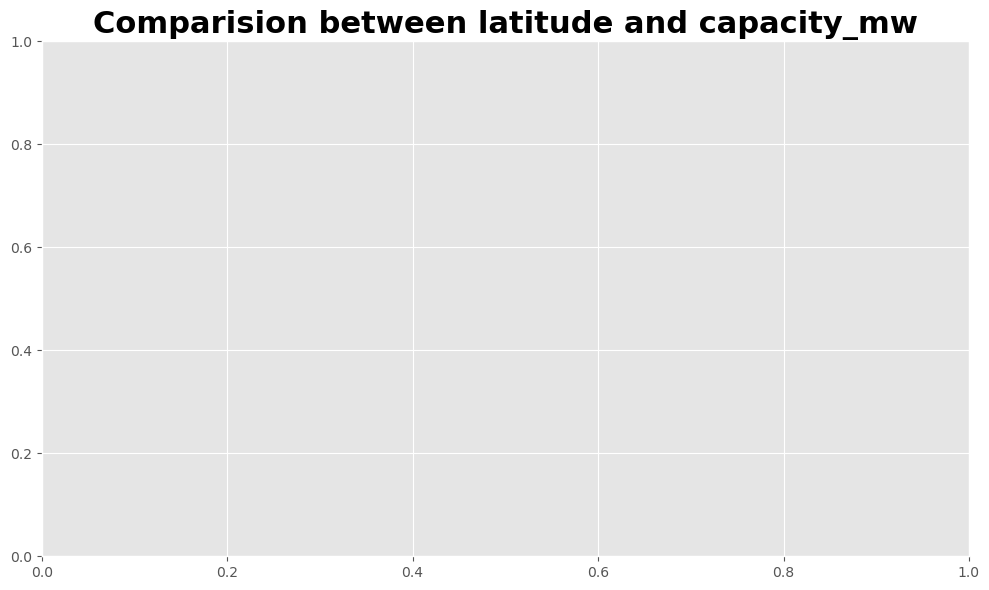

In [27]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()


In [29]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

KeyError: 'Power_plant_age'

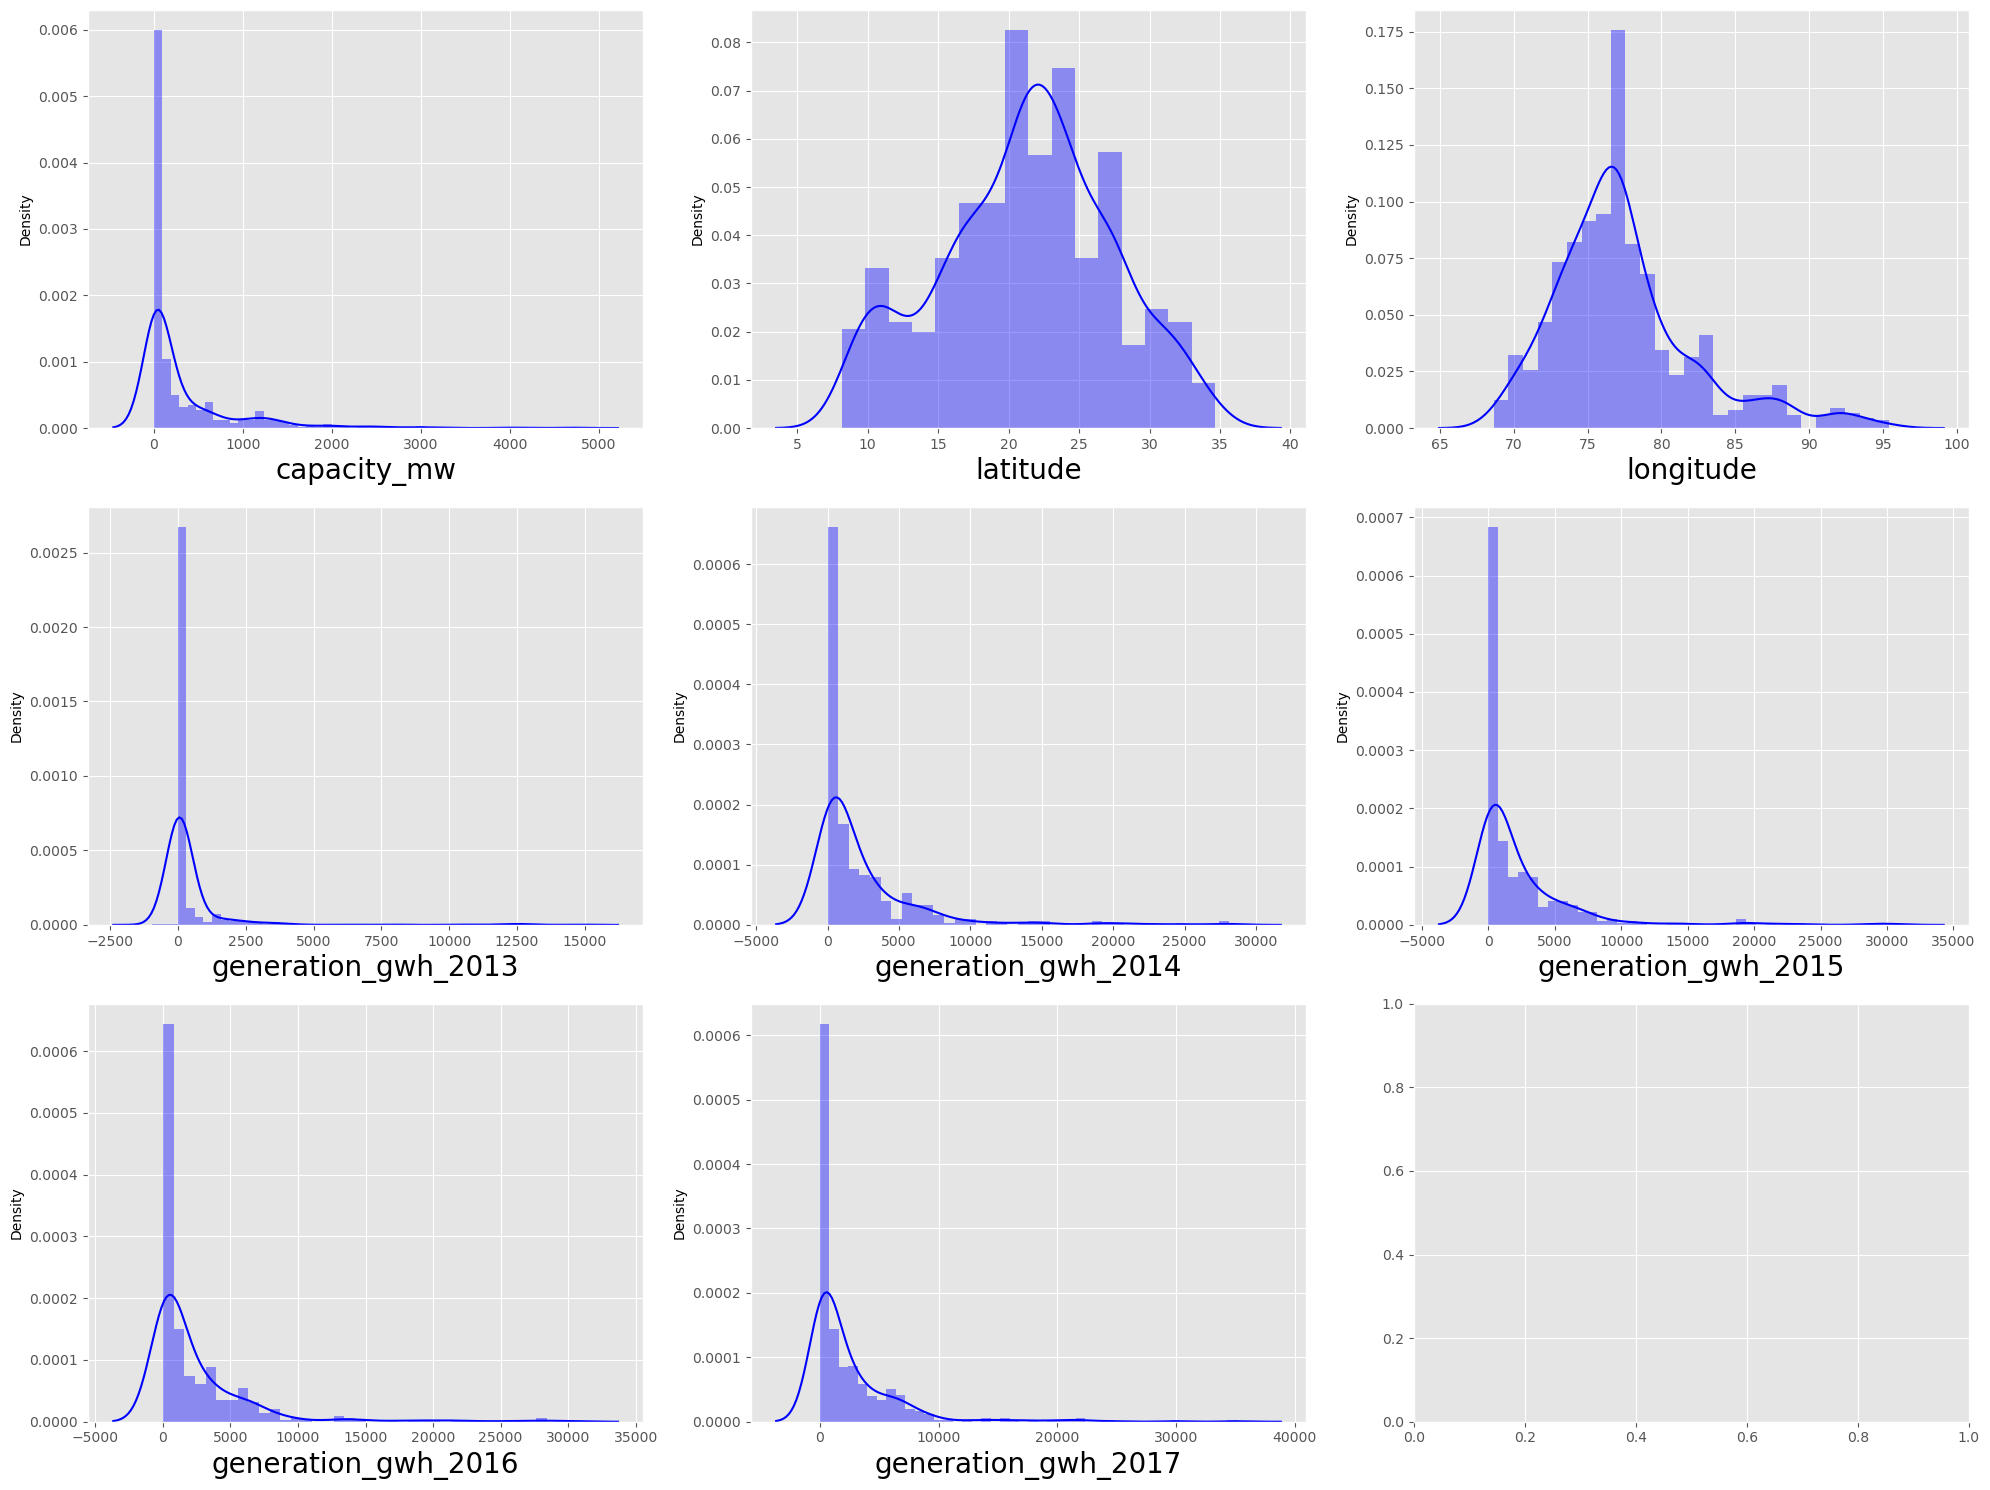

In [30]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
#Encoding catogorical data
df.drop(columns=['name'],axis=1,inplace=True)

In [32]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [33]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [34]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,3,NaN,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN


KeyError: 'Power_plant_age'

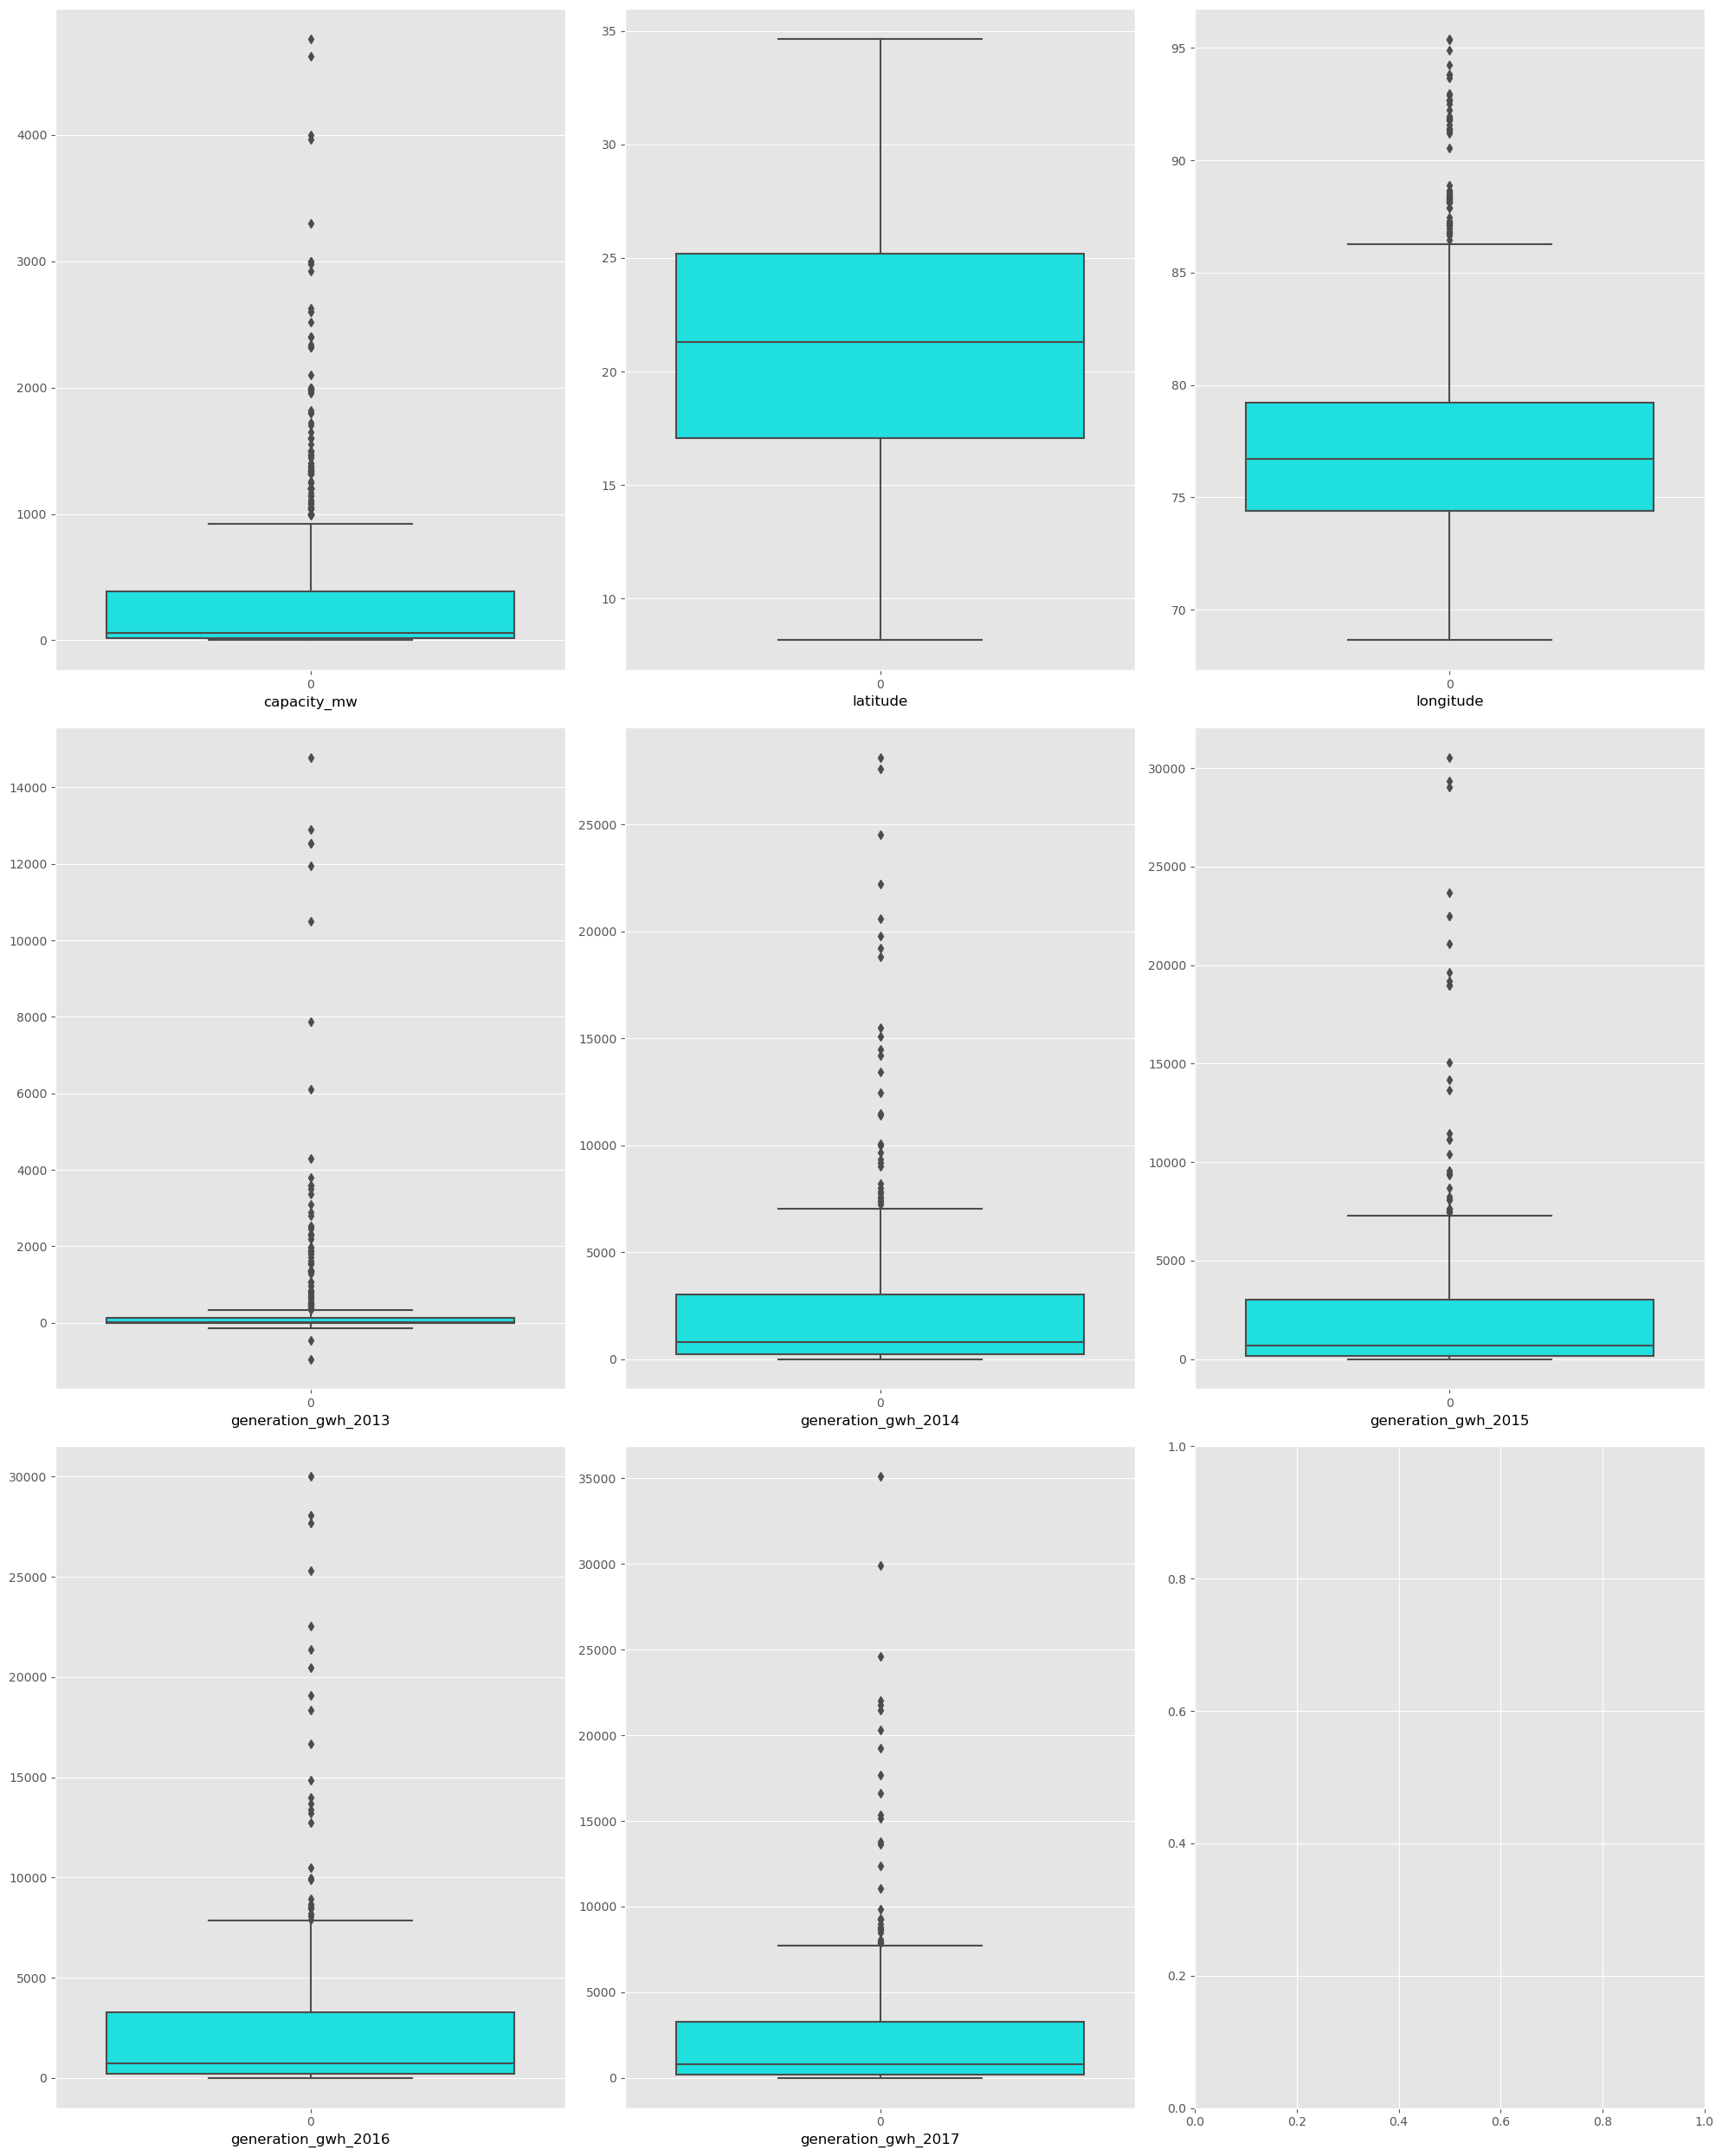

In [35]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [39]:
df2=df.copy

In [40]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
commissioning_year       87.000000
generation_gwh_2013    1282.273750
generation_gwh_2014    5252.204663
generation_gwh_2015    5060.733915
generation_gwh_2016    5157.019802
generation_gwh_2017    5579.967750
generation_gwh_2018    5988.440800
dtype: float64


In [41]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(854, 13)


In [42]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


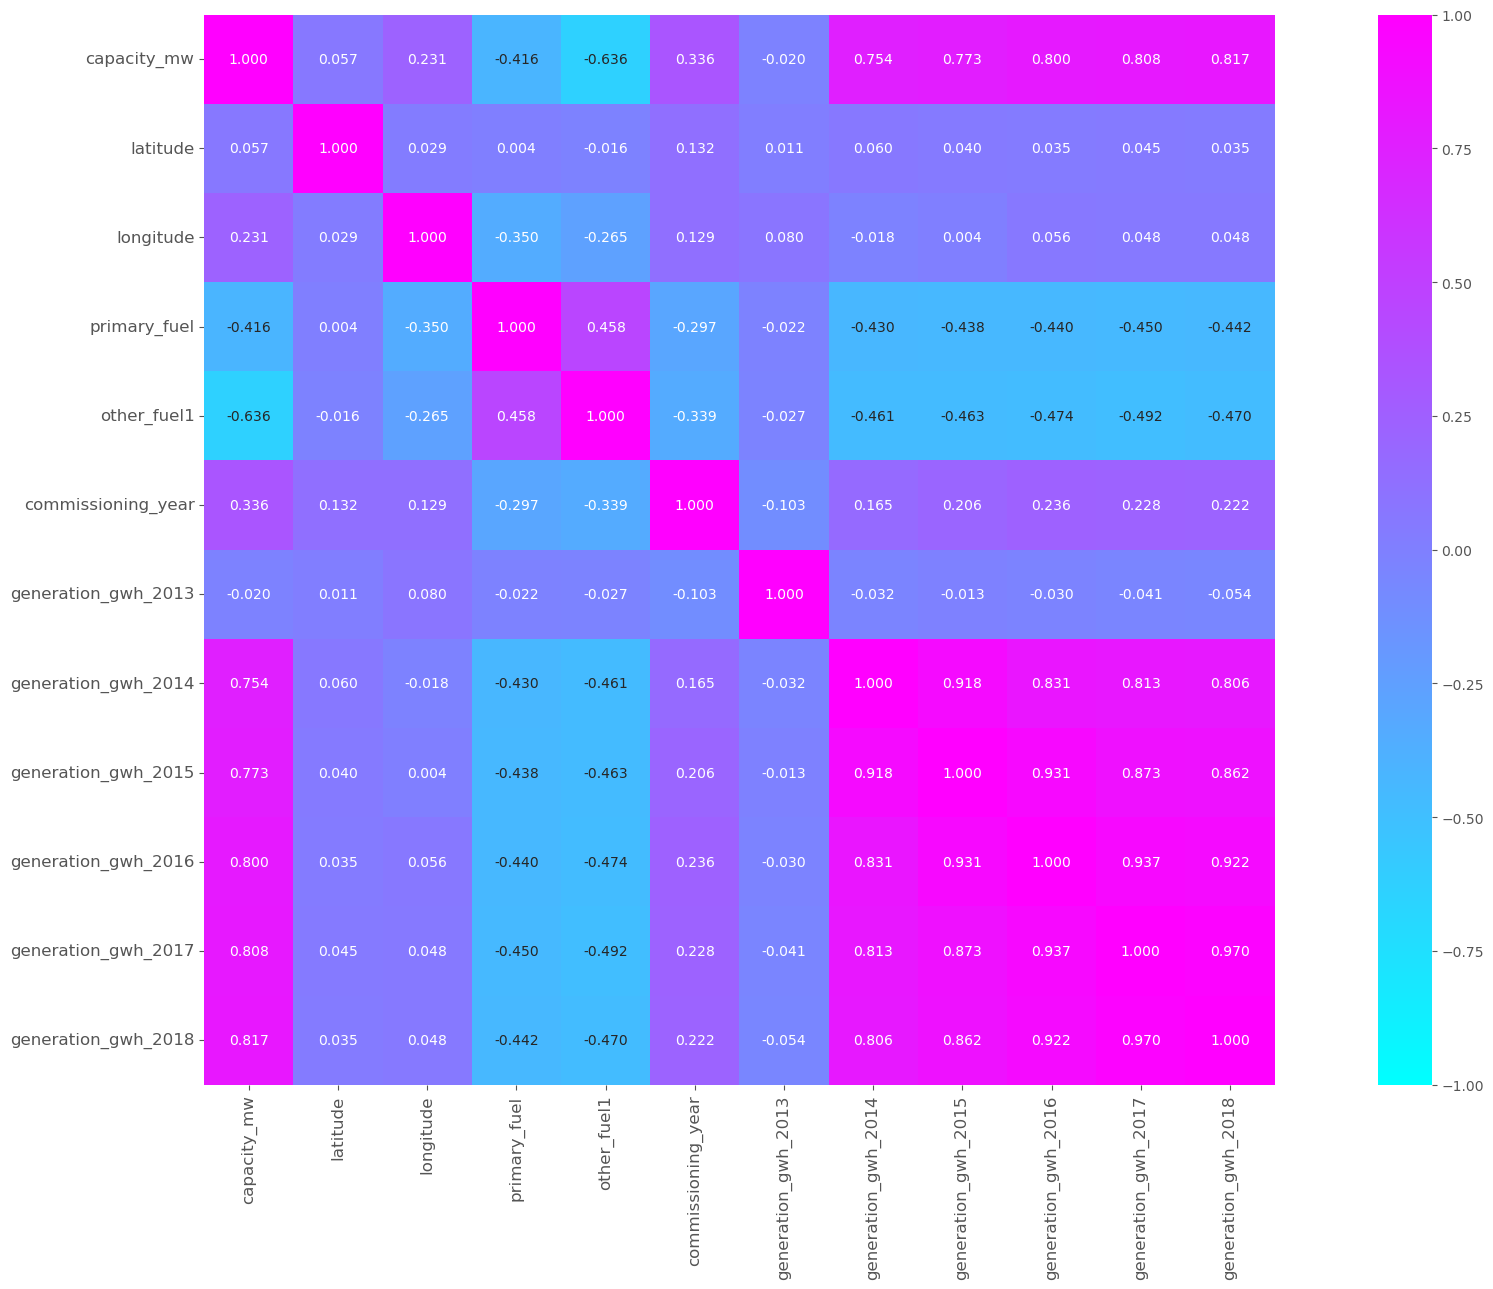

In [43]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [44]:
data.skew()

capacity_mw            1.936387
latitude              -0.131956
longitude              1.199632
primary_fuel           0.419692
other_fuel1           -1.821627
commissioning_year    -1.035415
generation_gwh_2013    3.351090
generation_gwh_2014    1.609535
generation_gwh_2015    1.528009
generation_gwh_2016    1.582874
generation_gwh_2017    1.473375
generation_gwh_2018    1.512171
dtype: float64

In [45]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [46]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

KeyError: "['Power_plant_age'] not in index"

In [47]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.936387
latitude              -0.131956
longitude              1.199632
primary_fuel           0.419692
other_fuel1           -1.821627
commissioning_year    -1.035415
generation_gwh_2013    3.351090
generation_gwh_2014    1.609535
generation_gwh_2015    1.528009
generation_gwh_2016    1.582874
generation_gwh_2017    1.473375
generation_gwh_2018    1.512171
dtype: float64

In [48]:
data.drop("other_fuel1",axis=1,inplace=True)

In [49]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

KeyError: "['other_fuel1'] not found in axis"

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [51]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

ValueError: could not convert string to float: 'Central Electricity Authority'

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


NameError: name 'X_scale' is not defined